<a href="https://colab.research.google.com/github/sh523m/py/blob/master/ML%20Teachers%20Salary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/canada_per_capita_income.csv')
df.head(4)


,year,income
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248


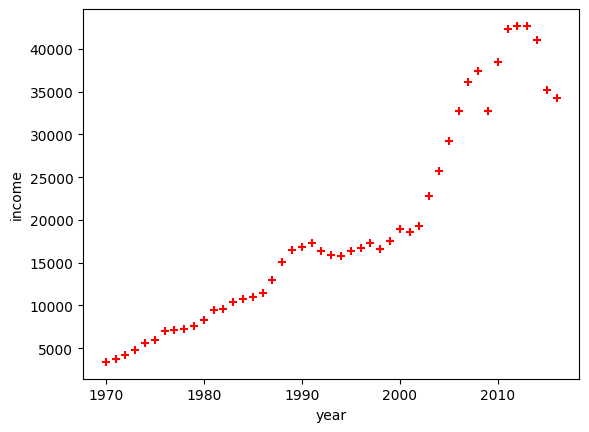

In [ ]:
%matplotlib inline
plt.xlabel('year')
plt.ylabel('income')
plt.scatter(df.year,df.income,color='red',marker='+')

In [ ]:
new_df = df.drop('income',axis='columns')
new_df.head()

,year
0,1970
1,1971
2,1972
3,1973
4,1974


In [ ]:
year = df.income
year.head()

0    3399.299037
1    3768.297935
2    4251.175484
3    4804.463248
4    5576.514583
Name: income, dtype: float64

In [ ]:
reg = linear_model.LinearRegression()
reg.fit(new_df,year)

LinearRegression()

In [ ]:
reg.predict([[2020]])

NameError: ignored

In [ ]:
#2nd Exercise
import pandas as pd
import numpy as np
from sklearn import linear_model

In [ ]:
df = pd.read_csv('/content/hiring.csv')
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [ ]:
df.experience = df.experience.fillna('zero')
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [ ]:
pip install word2number

In [ ]:
from word2number import w2n

In [ ]:
print(w2n.word_to_num("two million three thousand nine hundred and eighty four"))

2003984


In [ ]:
df.experience = df.experience.apply(w2n.word_to_num)

In [ ]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [ ]:
df = df.rename(columns={'salary($)': 'salary','test_score(out of 10)':'test_score'})

In [ ]:
df.test_score = df.test_score.fillna(df.test_score.mean())
df

,experience,test_score,interview_score(out of 10),salary
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [ ]:
reg = linear_model.LinearRegression()
reg.fit(df[['experience','test_score','interview_score(out of 10)']],df.salary)

LinearRegression()

In [ ]:
reg.predict([[2,9,6]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53205.96797671])

In [ ]:
reg.predict([[12,10,10]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([92002.18340611])